# Sources

In [541]:
# Import dependencies
import pandas as pd
import re
import os
import datetime
import matplotlib.pyplot as plt
import peakutils
from scipy import stats 

# ETL Process

## Extract

In [59]:
## Loop for including year and month column in 13 files selected
directory = 'd:/Users/rodrigo.guarneros.IFT/Desktop/HW1/Tableau/'
## for that we use OS module in python that provides functions to interact with the operating system and files.
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        date_for_file1 = filename.split("-")[1].split()[0]
        date_for_file = datetime.datetime.strptime(date_for_file1, "%Y%m").date()
        df = pd.read_csv(filename)
        # Following line will put your date in the "DATE" column for every record of this file
        df["DATE"] = date_for_file
# creating a new file with the columns      
        df.to_csv(f"{filename[0:9]}.csv")
    else:
        continue

In [504]:
# Loop for getting a list of reading  files so as to use in a concat function
directory = 'd:/Users/rodrigo.guarneros.IFT/Desktop/HW1/Tableau/'
bikes = []
for file in os.listdir(directory):
    if file.endswith('.csv'):
        df = pd.read_csv(f'{directory}{file}')
        bikes.append(df)
    else:
        continue

In [505]:
# Concat all the files into one and show as DF
bikes = pd.concat(bikes, axis=0, join='outer', ignore_index=True)

In [355]:
bikes.shape

(356530, 17)


## Transform


In [506]:
bikes.describe

<bound method NDFrame.describe of         Unnamed: 0  tripduration                 starttime  \
0                0          1553  2019-12-01 00:07:13.9360   
1                1           416  2019-12-01 00:16:40.4700   
2                2           294  2019-12-01 00:20:29.7980   
3                3            97  2019-12-01 00:21:13.7580   
4                4           286  2019-12-01 00:29:58.0230   
...            ...           ...                       ...   
356525       11689          1750  2020-12-31 23:07:44.0030   
356526       11690          1519  2020-12-31 23:18:00.2630   
356527       11691          1761  2020-12-31 23:31:09.4620   
356528       11692           637  2020-12-31 23:35:45.4640   
356529       11693          1607  2020-12-31 23:48:34.5750   

                        stoptime  start station id start station name  \
0       2019-12-01 00:33:07.6820              3681           Grand St   
1       2019-12-01 00:23:36.5700              3195            Sip Ave   
2 

In [507]:
bikes.isna().sum()

Unnamed: 0                 0
tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
DATE                       0
dtype: int64

In [508]:
bikes.columns

Index(['Unnamed: 0', 'tripduration', 'starttime', 'stoptime',
       'start station id', 'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'DATE'],
      dtype='object')

In [509]:
#split year in two columns
bikes["year"]= pd.DatetimeIndex(bikes["DATE"]).year

In [510]:
bikes["month"]= pd.DatetimeIndex(bikes["DATE"]).month

In [511]:
bikes

,Unnamed: 0,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,DATE,year,month
0,0,1553,2019-12-01 00:07:13.9360,2019-12-01 00:33:07.6820,3681,Grand St,40.715178,-74.037683,3198,Heights Elevator,40.748716,-74.040443,29462,Subscriber,1980,1,2019-12-01,2019,12
1,1,416,2019-12-01 00:16:40.4700,2019-12-01 00:23:36.5700,3195,Sip Ave,40.730897,-74.063913,3679,Bergen Ave,40.722104,-74.071455,29610,Subscriber,1956,1,2019-12-01,2019,12
2,2,294,2019-12-01 00:20:29.7980,2019-12-01 00:25:23.9690,3195,Sip Ave,40.730897,-74.063913,3678,Fairmount Ave,40.725726,-74.071959,26166,Subscriber,1977,1,2019-12-01,2019,12
3,3,97,2019-12-01 00:21:13.7580,2019-12-01 00:22:51.5970,3202,Newport PATH,40.727224,-74.033759,3638,Washington St,40.724294,-74.035483,29492,Subscriber,1993,1,2019-12-01,2019,12
4,4,286,2019-12-01 00:29:58.0230,2019-12-01 00:34:44.2280,3195,Sip Ave,40.730897,-74.063913,3679,Bergen Ave,40.722104,-74.071455,29440,Customer,1990,1,2019-12-01,2019,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356525,11689,1750,2020-12-31 23:07:44.0030,2020-12-31 23:36:54.4710,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,-74.032108,40440,Customer,1969,0,2020-12-01,2020,12
356526,11690,1519,2020-12-31 23:18:00.2630,2020-12-31 23:43:19.8590,3184,Paulus Hook,40.714145,-74.033552,3195,Sip Ave,40.730897,-74.063913,46340,Customer,1969,0,2020-12-01,2020,12
356527,11691,1761,2020-12-31 23:31:09.4620,2021-01-01 00:00:31.3290,3195,Sip Ave,40.730897,-74.063913,3270,Jersey & 6th St,40.725289,-74.045572,40907,Customer,1998,1,2020-12-01,2020,12
356528,11692,637,2020-12-31 23:35:45.4640,2020-12-31 23:46:22.7300,3681,Grand St,40.715178,-74.037683,3199,Newport Pkwy,40.728745,-74.032108,42250,Customer,1969,0,2020-12-01,2020,12


In [512]:
bikes = bikes.drop(columns=['Unnamed: 0'], axis=1)
bikes

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,DATE,year,month
0,1553,2019-12-01 00:07:13.9360,2019-12-01 00:33:07.6820,3681,Grand St,40.715178,-74.037683,3198,Heights Elevator,40.748716,-74.040443,29462,Subscriber,1980,1,2019-12-01,2019,12
1,416,2019-12-01 00:16:40.4700,2019-12-01 00:23:36.5700,3195,Sip Ave,40.730897,-74.063913,3679,Bergen Ave,40.722104,-74.071455,29610,Subscriber,1956,1,2019-12-01,2019,12
2,294,2019-12-01 00:20:29.7980,2019-12-01 00:25:23.9690,3195,Sip Ave,40.730897,-74.063913,3678,Fairmount Ave,40.725726,-74.071959,26166,Subscriber,1977,1,2019-12-01,2019,12
3,97,2019-12-01 00:21:13.7580,2019-12-01 00:22:51.5970,3202,Newport PATH,40.727224,-74.033759,3638,Washington St,40.724294,-74.035483,29492,Subscriber,1993,1,2019-12-01,2019,12
4,286,2019-12-01 00:29:58.0230,2019-12-01 00:34:44.2280,3195,Sip Ave,40.730897,-74.063913,3679,Bergen Ave,40.722104,-74.071455,29440,Customer,1990,1,2019-12-01,2019,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356525,1750,2020-12-31 23:07:44.0030,2020-12-31 23:36:54.4710,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,-74.032108,40440,Customer,1969,0,2020-12-01,2020,12
356526,1519,2020-12-31 23:18:00.2630,2020-12-31 23:43:19.8590,3184,Paulus Hook,40.714145,-74.033552,3195,Sip Ave,40.730897,-74.063913,46340,Customer,1969,0,2020-12-01,2020,12
356527,1761,2020-12-31 23:31:09.4620,2021-01-01 00:00:31.3290,3195,Sip Ave,40.730897,-74.063913,3270,Jersey & 6th St,40.725289,-74.045572,40907,Customer,1998,1,2020-12-01,2020,12
356528,637,2020-12-31 23:35:45.4640,2020-12-31 23:46:22.7300,3681,Grand St,40.715178,-74.037683,3199,Newport Pkwy,40.728745,-74.032108,42250,Customer,1969,0,2020-12-01,2020,12


In [513]:
bikes.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                   int64
gender                       int64
DATE                        object
year                         int64
month                        int64
dtype: object

In [364]:
# Only to proof if we are doing well the concat
bikes.loc[(bikes["year"]==2020) & (bikes["month"]== 3)]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,DATE,year,month
68710,389,2020-03-01 00:14:07.0000,2020-03-01 00:20:36.0880,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,-74.044247,42381,Subscriber,1992,1,2020-03-01,2020,3
68711,242,2020-03-01 00:48:06.4390,2020-03-01 00:52:08.9870,3185,City Hall,40.717732,-74.043845,3205,JC Medical Center,40.716540,-74.049638,42155,Subscriber,1991,1,2020-03-01,2020,3
68712,124,2020-03-01 01:08:46.4880,2020-03-01 01:10:51.2780,3272,Jersey & 3rd,40.723332,-74.045953,3278,Monmouth and 6th,40.725685,-74.048790,42376,Subscriber,1987,0,2020-03-01,2020,3
68713,104,2020-03-01 01:22:35.4790,2020-03-01 01:24:20.2470,3202,Newport PATH,40.727224,-74.033759,3638,Washington St,40.724294,-74.035483,42350,Subscriber,1993,1,2020-03-01,2020,3
68714,228,2020-03-01 01:39:20.2680,2020-03-01 01:43:09.1380,3194,McGinley Square,40.725340,-74.067622,3280,Astor Place,40.719282,-74.071262,42235,Subscriber,1988,1,2020-03-01,2020,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86424,296,2020-03-31 22:50:39.0410,2020-03-31 22:55:35.5980,3191,Union St,40.718211,-74.083639,3694,Jackson Square,40.711130,-74.078900,42145,Subscriber,1994,1,2020-03-01,2020,3
86425,147,2020-03-31 23:09:15.9690,2020-03-31 23:11:43.5310,3640,Journal Square,40.733670,-74.062500,3206,Hilltop,40.731169,-74.057574,42110,Subscriber,1991,1,2020-03-01,2020,3
86426,364,2020-03-31 23:17:02.0240,2020-03-31 23:23:06.8200,3195,Sip Ave,40.730897,-74.063913,3679,Bergen Ave,40.722104,-74.071455,42550,Subscriber,1986,1,2020-03-01,2020,3
86427,1217,2020-03-31 23:36:10.6430,2020-03-31 23:56:27.8120,3267,Morris Canal,40.712419,-74.038526,3276,Marin Light Rail,40.714584,-74.042817,42115,Subscriber,1986,1,2020-03-01,2020,3



# Exploratory data analysis


In [365]:
# How manu trips during the period chosen (December 2019 to February 2021)

bikes.describe()

# 356,530


,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,year,month
count,3.565300e+05,356530.000000,356530.000000,356530.000000,356530.000000,356530.000000,356530.000000,356530.000000,356530.000000,356530.000000,356530.000000,356530.000000
mean,1.517492e+03,3304.083743,40.722251,-74.046764,3303.025212,40.721774,-74.045952,39967.566252,1981.304157,1.102031,2019.944667,7.074933
std,1.759011e+04,184.358702,0.007315,0.011868,190.090982,0.096724,0.175774,6528.289358,11.009014,0.623743,0.228630,3.207607
min,6.100000e+01,3184.000000,40.709651,-74.083639,82.000000,0.000000,-74.083639,14531.000000,1888.000000,0.000000,2019.000000,1.000000
25%,3.150000e+02,3195.000000,40.716870,-74.050990,3195.000000,40.716870,-74.050656,41696.000000,1969.000000,1.000000,2020.000000,5.000000
50%,5.860000e+02,3209.000000,40.721124,-74.043991,3209.000000,40.721124,-74.043845,42350.000000,1984.000000,1.000000,2020.000000,8.000000
75%,1.347000e+03,3276.000000,40.727224,-74.038051,3276.000000,40.727224,-74.037683,42635.000000,1990.000000,2.000000,2020.000000,9.000000
max,3.261756e+06,3792.000000,40.748716,-74.032108,4071.000000,40.848282,0.000000,49734.000000,2004.000000,2.000000,2020.000000,12.000000


In [366]:
# proportion of every type
count_bikes = bikes.groupby("usertype")["bikeid"].count()
customer = count_bikes[0]
subscriber = count_bikes[1]
total = customer + subscriber
print(f'Percentage of customers:{customer/total}')
print(f'Percentage of subscriber:{subscriber/total}')

Percentage of customers:0.29873222449723724
Percentage of subscriber:0.7012677755027628


In [367]:
# How has the proportion of short-term customers and annual subscribers changed?
bikes_initial_period = bikes.loc[(bikes["year"]==2019) & (bikes["month"]== 12)]
bikes_final_period = bikes.loc[(bikes["year"]==2020) & (bikes["month"]== 12)]
bikes_group1 = bikes_initial_period.groupby("usertype").count()
bikes_group2 = bikes_final_period.groupby("usertype").count()
initial = bikes_group1[["tripduration"]]
final = bikes_group2[["bikeid"]]
frames = [initial, final]
changedf = pd.concat(frames, axis = 1)
changedf = changedf.rename(columns = {"tripduration":"December 2019", "bikeid":"December 2020"})
changedf["Share 2019"] = (changedf["December 2019"]/changedf["December 2019"].sum())*100
changedf["Share 2020"] = (changedf["December 2020"]/changedf["December 2020"].sum())*100
changedf["Growth Rate"] = ((changedf["Share 2020"]/changedf["Share 2019"])-1)*100
changedf = changedf.round(2)
changedf.to_csv('d:/Users/rodrigo.guarneros.IFT/Desktop/HW1/Tableau/proportion.csv', index=False)
changedf

,December 2019,December 2020,Share 2019,Share 2020,Growth Rate
usertype,,,,,
Customer,1236,2290,6.27,19.58,212.56
Subscriber,18492,9404,93.73,80.42,-14.21


In [368]:
# What are the peak hours in which bikes are used during summer months?
# Let's say january to september 2020 as summer months
bikes_summer = bikes.loc[(bikes["year"]==2020) & (bikes["month"]>= 6) & (bikes["month"]<=9)]
# make a resample by hour
bikes_summer['starttime'] =  pd.to_datetime(bikes_summer['starttime'])
bikes_peak = bikes_summer.resample("H", on = "starttime").tripduration.count()
bikes_peak = pd.DataFrame(bikes_peak).reset_index()
bikes_peak = bikes_peak.rename(columns = {"tripduration":"Frequency"})
bikes_peak.to_csv('d:/Users/rodrigo.guarneros.IFT/Desktop/HW1/Tableau/peak_summer.csv', index=False)
bikes_peak

d:\users\rodrigo.guarneros.ift\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,starttime,Frequency
0,2020-06-01 00:00:00,2
1,2020-06-01 01:00:00,9
2,2020-06-01 02:00:00,0
3,2020-06-01 03:00:00,0
4,2020-06-01 04:00:00,9
...,...,...
3227,2020-10-13 11:00:00,18
3228,2020-10-13 12:00:00,41
3229,2020-10-13 13:00:00,31
3230,2020-10-13 14:00:00,37


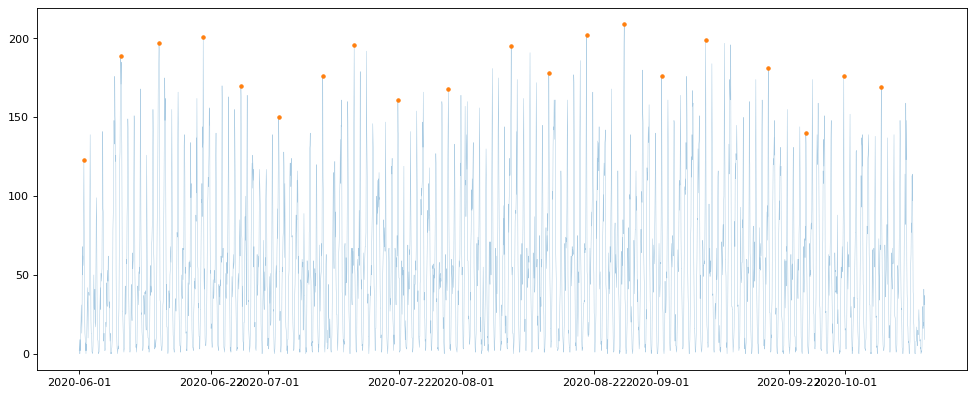

In [369]:
# Identifying peaks in summer


plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

col1 = bikes_peak["starttime"] # First column data
col2 = bikes_peak["Frequency"] # Second column data

index = peakutils.indexes(col2, thres=0.5, min_dist=120)

plt.plot(col1,col2, lw=0.4, alpha=0.4 )
plt.plot(col1[index],col2[index], marker="o", ls="", ms=3 )

plt.show()

In [370]:
# peak hours during the summer were:
peak_hours = pd.DataFrame(col1[index])
peak_hours.to_csv('d:/Users/rodrigo.guarneros.IFT/Desktop/HW1/Tableau/peak_hours.csv', index=False)
peak_hours

,starttime
18,2020-06-01 18:00:00
158,2020-06-07 14:00:00
305,2020-06-13 17:00:00
474,2020-06-20 18:00:00
618,2020-06-26 18:00:00
762,2020-07-02 18:00:00
930,2020-07-09 18:00:00
1051,2020-07-14 19:00:00
1218,2020-07-21 18:00:00
1411,2020-07-29 19:00:00


In [371]:
# What are the peak hours in which bikes are used during winter months?
# Let's say december to march as summer months
bikes_winter = bikes.loc[(bikes["year"]==2020) & (bikes["month"]== 1) | (bikes["year"]==2021) & (bikes["month"]==1)]
# make a resample by hour
bikes_winter[['date','time']] = bikes_winter['starttime'].str.split(expand=True)
bikes_winter['starttime'] =  pd.to_datetime(bikes_winter['starttime'])
bikes_peak = bikes_winter.resample("H", on = "starttime").tripduration.count()
bikes_peak = pd.DataFrame(bikes_peak).reset_index()
bikes_peak = bikes_peak.rename(columns = {"tripduration":"Frequency"})
bikes_peak.to_csv('d:/Users/rodrigo.guarneros.IFT/Desktop/HW1/Tableau/peak_winter.csv', index=False)
bikes_peak


d:\users\rodrigo.guarneros.ift\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
d:\users\rodrigo.guarneros.ift\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,starttime,Frequency
0,2020-01-01 00:00:00,10
1,2020-01-01 01:00:00,14
2,2020-01-01 02:00:00,9
3,2020-01-01 03:00:00,6
4,2020-01-01 04:00:00,2
...,...,...
739,2020-01-31 19:00:00,45
740,2020-01-31 20:00:00,40
741,2020-01-31 21:00:00,17
742,2020-01-31 22:00:00,11


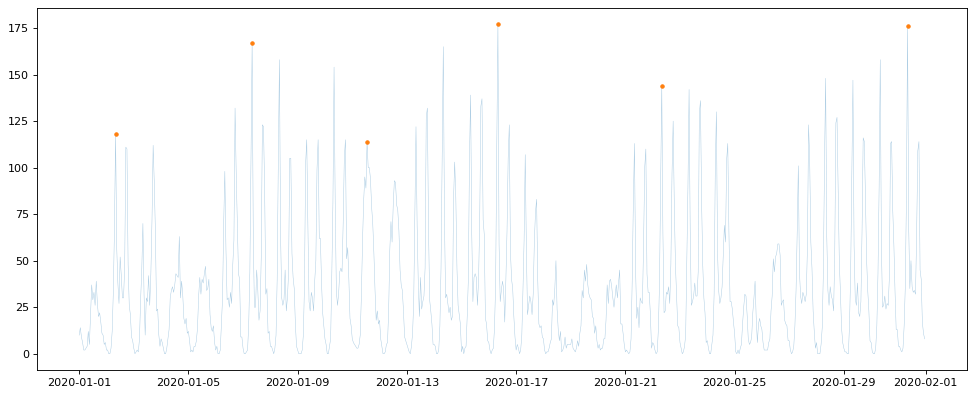

In [373]:
# Identifying peaks in winter
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

col1 = bikes_peak["starttime"] # First column data
col2 = bikes_peak["Frequency"] # Second column data

index = peakutils.indexes(col2, thres=0.5, min_dist=100)

plt.plot(col1,col2, lw=0.4, alpha=0.4 )
plt.plot(col1[index],col2[index], marker="o", ls="", ms=3 )

plt.show()

In [374]:
# peak hours during the summer were:
peak_hours = pd.DataFrame(col1[index])
peak_hours.to_csv('d:/Users/rodrigo.guarneros.IFT/Desktop/HW1/Tableau/peak_hours_winter.csv', index=False)
peak_hours

,starttime
32,2020-01-02 08:00:00
152,2020-01-07 08:00:00
253,2020-01-11 13:00:00
368,2020-01-16 08:00:00
512,2020-01-22 08:00:00
728,2020-01-31 08:00:00


In [456]:
# Today, what are the top 10 stations in the city for starting a journey? (Based on data, why do you hypothesize these are the top locations?)
# If we consider starting a journey as the stations that beggin before all the activity I think that the top ten is near from parks because people would
# weak up earlier so as to make excercise or most likely they are near from a hospital. Let's suppose that today is december
bikes_today = bikes.loc[(bikes["year"]==2020) & (bikes["month"]== 12)]
bikes_today["counter"] = int(1)
bikes_today['starttime'] =  pd.to_datetime(bikes_today['starttime'])
#bikes_today = bikes_today.resample('H', on='starttime').counter.sum()
bikes_today1 = bikes_today.groupby([pd.Grouper(key="starttime", freq="H"), "start station id", "start station latitude", "start station longitude"]).counter.sum()
bikes_today1 = pd.DataFrame(bikes_today1)
bikes_today1.sort_values("starttime", inplace=True)
bikes_today1 = bikes_today1.head(10)
bikes_today1.to_csv('d:/Users/rodrigo.guarneros.IFT/Desktop/HW1/Tableau/top_ten_start.csv')
bikes_today1


d:\users\rodrigo.guarneros.ift\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
d:\users\rodrigo.guarneros.ift\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


counter
starttime           start station id start station latitude start station longitude         
2020-12-01 00:00:00 3186             40.719586              -74.043117                     1
                    3202             40.727224              -74.033759                     1
                    3640             40.733670              -74.062500                     2
2020-12-01 01:00:00 3194             40.725340              -74.067622                     1
                    3212             40.734786              -74.050444                     1
2020-12-01 03:00:00 3184             40.714145              -74.033552                     2
2020-12-01 04:00:00 3194             40.725340              -74.067622                     1
2020-12-01 05:00:00 3678             40.725726              -74.071959                     4
                    3199             40.728745              -74.032108                     2
                    3194             40.725340              -74.067622                     2

In [455]:
# Today, what are the top 10 stations in the city for ending a journey? (Based on data, why?)
# Perhaps they are near from households
bikes_today2 = bikes.loc[(bikes["year"]==2020) & (bikes["month"]== 12)]
bikes_today2["counter"] = int(1)
bikes_today2['stoptime'] =  pd.to_datetime(bikes_today2['stoptime'])
#bikes_today = bikes_today.resample('H', on='starttime').counter.sum()
bikes_today2 = bikes_today2.groupby([pd.Grouper(key="stoptime", freq="H"), "end station id", "end station latitude", "end station longitude"]).counter.sum()
bikes_today2 = pd.DataFrame(bikes_today2)
bikes_today2.sort_values("stoptime", inplace=True)
bikes_today2 = bikes_today2.head(10)
bikes_today2.to_csv('d:/Users/rodrigo.guarneros.IFT/Desktop/HW1/Tableau/top_ten_stop.csv')
bikes_today2


d:\users\rodrigo.guarneros.ift\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
d:\users\rodrigo.guarneros.ift\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


counter
stoptime            end station id end station latitude end station longitude         
2020-12-01 00:00:00 3194           40.725340            -74.067622                   1
                    3199           40.728745            -74.032108                   1
                    3270           40.725289            -74.045572                   1
                    3280           40.719282            -74.071262                   1
2020-12-01 01:00:00 3195           40.730897            -74.063913                   1
                    3209           40.724176            -74.050656                   1
2020-12-01 04:00:00 3195           40.730897            -74.063913                   1
2020-12-01 05:00:00 3792           40.716870            -74.032810                   2
                    3275           40.718355            -74.038914                   1
                    3187           40.721124            -74.038051                   1

In [482]:
# Today, what are the bottom 10 stations in the city for starting a journey? (Based on data, why?)
# Based on the number of startings
bikes_today = bikes.loc[(bikes["year"]==2020) & (bikes["month"]== 12)]
bikes_today["counter"] = int(1)
bikes_today['starttime'] =  pd.to_datetime(bikes_today['starttime'])
#bikes_today = bikes_today.resample('H', on='starttime').counter.sum()
bikes_today1 = bikes_today.groupby([pd.Grouper(key="starttime", freq="H"), "start station id", "start station latitude", "start station longitude"]).counter.sum()
bikes_today1 = pd.DataFrame(bikes_today1).reset_index()
bikes_today1.sort_values(['counter','starttime'], ascending = [False, True],inplace=True)
bikes_today1.head(10)
bikes_today1.to_csv('d:/Users/rodrigo.guarneros.IFT/Desktop/HW1/Tableau/top_ten_startbyquantity.csv')
bikes_today1

d:\users\rodrigo.guarneros.ift\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
d:\users\rodrigo.guarneros.ift\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,starttime,start station id,start station latitude,start station longitude,counter
3940,2020-12-13 14:00:00,3199,40.728745,-74.032108,14
1683,2020-12-06 13:00:00,3199,40.728745,-74.032108,11
1763,2020-12-06 16:00:00,3199,40.728745,-74.032108,11
3901,2020-12-13 13:00:00,3192,40.711242,-74.055701,11
4007,2020-12-13 16:00:00,3205,40.716540,-74.049638,10
...,...,...,...,...,...
7549,2020-12-31 23:00:00,3184,40.714145,-74.033552,1
7550,2020-12-31 23:00:00,3195,40.730897,-74.063913,1
7551,2020-12-31 23:00:00,3199,40.728745,-74.032108,1
7552,2020-12-31 23:00:00,3267,40.712419,-74.038526,1


In [483]:
# Today, what are the bottom 10 stations in the city for ending a journey (Based on data, why?)
# Based on the number of endings
bikes_today = bikes.loc[(bikes["year"]==2020) & (bikes["month"]== 12)]
bikes_today["counter"] = int(1)
bikes_today['stoptime'] =  pd.to_datetime(bikes_today['stoptime'])
#bikes_today = bikes_today.resample('H', on='starttime').counter.sum()
bikes_today1 = bikes_today.groupby([pd.Grouper(key="stoptime", freq="H"), "end station id", "end station latitude", "end station longitude"]).counter.sum()
bikes_today1 = pd.DataFrame(bikes_today1).reset_index()
bikes_today1.sort_values(['counter','stoptime'], ascending = [False, True],inplace=True)
bikes_today1.head(10)
bikes_today1.to_csv('d:/Users/rodrigo.guarneros.IFT/Desktop/HW1/Tableau/top_ten_stopbyquantity.csv')
bikes_today1

d:\users\rodrigo.guarneros.ift\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
d:\users\rodrigo.guarneros.ift\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,stoptime,end station id,end station latitude,end station longitude,counter
3877,2020-12-13 14:00:00,3199,40.728745,-74.032108,13
3943,2020-12-13 16:00:00,3205,40.716540,-74.049638,13
1707,2020-12-06 16:00:00,3199,40.728745,-74.032108,12
3973,2020-12-13 17:00:00,3199,40.728745,-74.032108,12
3446,2020-12-12 11:00:00,3186,40.719586,-74.043117,11
...,...,...,...,...,...
7527,2020-12-31 23:00:00,3195,40.730897,-74.063913,1
7529,2021-01-01 00:00:00,3267,40.712419,-74.038526,1
7530,2021-01-01 00:00:00,3270,40.725289,-74.045572,1
7531,2021-01-02 17:00:00,3194,40.725340,-74.067622,1


In [494]:
# Today, what is the gender breakdown of active participants (Male v. Female)?
# The gender breakdown ndicates the percentages of the bike trips represented by each gender.
bike_gender = bikes.groupby("gender").count()
bike_gender = pd.DataFrame(bike_gender["tripduration"])
bike_gender = bike_gender.rename(columns = {"tripduration":"Frequency"})
bike_gender["Share_Gender"] = (bike_gender["Frequency"]/bike_gender["Frequency"].sum())*100
bike_gender = bike_gender.round(2)
bike_gender.to_csv('d:/Users/rodrigo.guarneros.IFT/Desktop/HW1/Tableau/proportion_gener.csv', index=True)
bike_gender



,Frequency,Share_Gender
gender,,
0,53022,14.87
1,214109,60.05
2,89399,25.07


In [495]:
# How effective has gender outreach been in increasing female ridership over the timespan?
# It has not been effective comparing the same month so as to avoid seasonality
bikes_initial_period = bikes.loc[(bikes["year"]==2019) & (bikes["month"]== 12)]
bikes_final_period = bikes.loc[(bikes["year"]==2020) & (bikes["month"]== 12)]
bikes_group1 = bikes_initial_period.groupby("gender").count()
bikes_group2 = bikes_final_period.groupby("gender").count()
initial = bikes_group1[["tripduration"]]
final = bikes_group2[["bikeid"]]
frames = [initial, final]
changedf = pd.concat(frames, axis = 1)
changedf = changedf.rename(columns = {"tripduration":"December 2019", "bikeid":"December 2020"})
changedf["Share 2019"] = (changedf["December 2019"]/changedf["December 2019"].sum())*100
changedf["Share 2020"] = (changedf["December 2020"]/changedf["December 2020"].sum())*100
changedf["Growth Rate"] = ((changedf["Share 2020"]/changedf["Share 2019"])-1)*100
changedf = changedf.round(2)
changedf.to_csv('d:/Users/rodrigo.guarneros.IFT/Desktop/HW1/Tableau/gender_outreach.csv', index=True)
changedf


,December 2019,December 2020,Share 2019,Share 2020,Growth Rate
gender,,,,,
0,825,1361,4.18,11.64,178.31
1,14302,7765,72.50,66.40,-8.41
2,4601,2568,23.32,21.96,-5.84


In [514]:
# How does the average trip duration change by age?
# create variable age
# It has a negative relationship
bikes["age"] = 2020-(bikes["birth year"])
bikes["tripduration"] = bikes["tripduration"]/60
bike_age = pd.DataFrame(bikes.groupby("age")["tripduration"].mean()).reset_index()
bike_age


,age,tripduration
0,16,58.741667
1,17,55.189041
2,18,59.252715
3,19,46.613542
4,20,66.825105
...,...,...
66,87,20.666667
67,90,34.862500
68,100,25.800000
69,120,11.283333


In [515]:
bike_age.to_csv('d:/Users/rodrigo.guarneros.IFT/Desktop/HW1/Tableau/agevstripduration.csv', index=True)

In [517]:
# What is the average distance in miles that a bike is ridden?
# To get the distance in km, we use the haversine_vectorize function available at: 
# https://kanoki.org/2019/12/27/how-to-calculate-distance-in-python-and-pandas-using-scipy-spatial-and-distance-functions/

import numpy as np

def haversine_vectorize(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    newlon = lon2 - lon1
    newlat = lat2 - lat1

    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2

    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM for miles use 3958
    return km

In [521]:
# Apply the function haversine_vectorize and creating a new column:

bikes["Distance_miles"] = (haversine_vectorize(bikes["start station longitude"], bikes["start station latitude"], bikes["end station longitude"], bikes["end station latitude"]))*0.62137

In [527]:
# average distance in miles by bike
bike_distance = pd.DataFrame(bikes.groupby("bikeid")["Distance_miles"].mean()).reset_index()
bike_distance.to_csv("d:/Users/rodrigo.guarneros.IFT/Desktop/HW1/Tableau/distance_everybike.csv")
bike_distance


,bikeid,Distance_miles
0,14531,0.648677
1,14536,0.493734
2,14578,0.589216
3,14585,0.616122
4,14598,0.521994
...,...,...
1847,48929,0.768461
1848,48930,0.779778
1849,48932,0.548859
1850,49058,0.264336


In [530]:
# The average distance in miles tha a bike is ridden = 0.67 miles or 1.075 km
(bike_distance["Distance_miles"].mean())/0.62137

1.0749206457010365

In [562]:
# Which bikes (by ID) are most likely due for repair or inspection in the timespan?
mainteinance = pd.DataFrame(bikes.groupby("bikeid")["Distance_miles"].sum()).reset_index()
mainteinance.sort_values('Distance_miles', ascending = False ,inplace=True)
mainteinance.to_csv("d:/Users/rodrigo.guarneros.IFT/Desktop/HW1/Tableau/maintainance.csv")
mainteinance

,bikeid,Distance_miles
1631,44683,5651.472338
905,40831,5554.356594
1159,42308,497.936707
1215,42364,497.514190
963,42112,493.141345
...,...,...
895,40587,0.000000
797,37372,0.000000
1760,45713,0.000000
712,32526,0.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1f285367f48>,
 'caps': [<matplotlib.lines.Line2D at 0x1f2ea275c48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f2892022c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1f281213188>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f2879662c8>],
 'means': []}

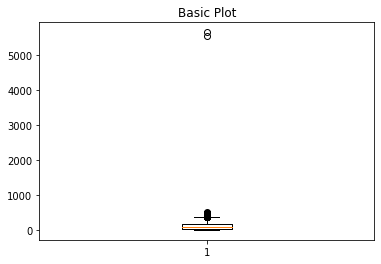

In [546]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(mainteinance["Distance_miles"])

(array([1850.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           2.]),
 array([   0.        ,  565.14723381, 1130.29446763, 1695.44170144,
        2260.58893526, 2825.73616907, 3390.88340289, 3956.0306367 ,
        4521.17787051, 5086.32510433, 5651.47233814]),
 <BarContainer object of 10 artists>)

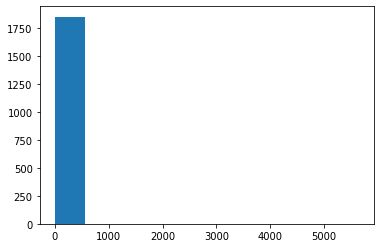

In [548]:
plt.hist(mainteinance["Distance_miles"])

In [549]:
# Inter quantile range
quartiles = mainteinance["Distance_miles"].quantile([.25,.5,.75])

lowerq = quartiles[.25]
upperq = quartiles[.75]

IQR = upperq- lowerq

upperbound = lowerq-(IQR*1.4)
lowerbound = upperq+(IQR*1.4) 

In [559]:
# Potential outliers
outliers = mainteinance.loc[(mainteinance["Distance_miles"]>lowerbound)]

In [563]:
# These are the bikes that need manteinance (151 of 1852)
outliers.to_csv("d:/Users/rodrigo.guarneros.IFT/Desktop/HW1/Tableau/mainteinance_out.csv")
outliers

,bikeid,Distance_miles
1631,44683,5651.472338
905,40831,5554.356594
1159,42308,497.936707
1215,42364,497.514190
963,42112,493.141345
...,...,...
892,40517,350.448680
1272,42421,348.724022
1661,44744,348.509716
1330,42479,348.036929


In [558]:
lowerbound

347.60846628834355

In [561]:
quartiles

0.25     36.927950
0.50     74.112380
0.75    166.378165
Name: Distance_miles, dtype: float64

In [574]:
# How variable is the utilization by bike ID?
bikes["counter"] = 1
utilization = pd.DataFrame(bikes.groupby("bikeid")["Distance_miles"].apply(np.std)).reset_index()
utilization.sort_values('Distance_miles', ascending = False ,inplace=True)
utilization.to_csv("d:/Users/rodrigo.guarneros.IFT/Desktop/HW1/Tableau/utilization_Var.csv")
utilization


,bikeid,Distance_miles
905,40831,326.417139
1631,44683,263.712248
790,36920,4.325304
841,39181,2.235818
754,34703,2.093404
...,...,...
788,36894,0.000000
119,25552,0.000000
782,36718,0.000000
1640,44698,0.000000


In [575]:
# Getting the final version of the database
bikes.to_csv("d:/Users/rodrigo.guarneros.IFT/Desktop/HW1/Tableau/bikes_master.csv")